In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003787481, 'queue_time': 0.050094006999999996, 'total_time': 0.053787481}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-09858d93-decd-42b5-a1ff-d54f47ef0f3c-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
from IPython.display import Image, display

from typing import TypedDict, Optional
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph,END
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

class State(TypedDict):
    video_url: str
    transcript: str
    blog: str

def extract_transcript(state: State) -> State:

    """Extracts transcript from a YouTube video URL."""

    if "video_url" not in state:
        raise KeyError("Missing 'video_url' in state.")
    video_id = state["video_url"].split("v=")[-1]  # Extract video ID
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
    text_transcript = " ".join([t["text"] for t in transcript])
    state["transcript"] = text_transcript
    print("Transcript Extracted")
    return state

def chunk_text(text: str, max_tokens: int = 500):

    """Splits text into chunks of max_tokens words."""

    words = text.split()
    chunks = []
    for i in range(0, len(words), max_tokens):
        chunks.append(" ".join(words[i:i + max_tokens]))
    return chunks

def generate_blog_section(chunk: str) -> str:

    """Generates a blog section for a given transcript chunk."""

    prompt_text = f"""
        You are a professional blog writer skilled in writing engaging, informative, and SEO-friendly articles.
        Convert the following YouTube transcript chunk into a well-structured blog section:
        
        {chunk}
        
        Ensure it is engaging and easy to read.
    """
    return llm.invoke(prompt_text).content  # Invoke LLM for each chunk

def generate_blog(state: State) -> State:

    """Generates a full blog by processing transcript chunks separately."""
    
    transcript_chunks = chunk_text(state["transcript"])  # Split transcript
    blog_sections = [generate_blog_section(chunk) for chunk in transcript_chunks]  # Process chunks
    state["blog"] = "\n\n".join(blog_sections)  # Combine sections
    return state


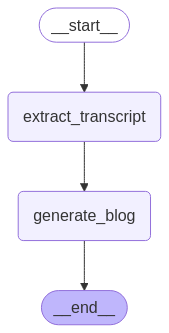

In [ ]:
builder = StateGraph(State)
builder.add_node("extract_transcript", extract_transcript)
builder.add_node("generate_blog", generate_blog)

builder.add_edge(START, "extract_transcript")
builder.add_edge("extract_transcript", "generate_blog")
builder.add_edge("generate_blog",END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
url="https://www.youtube.com/watch?v=UV81LAb3x2g&t=1732s&ab_channel=KrishNaik"
initial_state: State = { "video_url": url,
    "transcript": None, 
    "blog": None } 
# messages=[HumanMessage(content=f"Generate blog from this youtube link {url}")]
messages= graph.invoke(initial_state)
print("\n ✅ Final Blog Output:\n", messages["blog"])

Transcript Extracted

✅ Final Blog Output:
 ### Harnessing Crew AI for Real-World Use Cases: Building a Blog Platform from YouTube Videos

Welcome to our in-depth exploration of Crew AI, a powerful agent framework that enables the creation of multiple AI agents for various real-world applications. If you're new to Crew AI, you're in for a treat! This article will not only introduce you to the platform but also delve into a practical use case that showcases its potential.

Crew AI stands out from other platforms like LangChain by providing a robust framework for creating AI agents that can communicate efficiently with each other. This seamless communication is the key to executing tasks more efficiently. The platform is actively used by a community of developers who are harnessing its capabilities to create a variety of AI-driven solutions.

#### A Practical Use Case: Automating Blog Creation from YouTube Videos

Imagine you run a successful YouTube channel with over 1,000 videos, and y